# Attention

## Introduction

RNN(or more precisely LSTM/GRU) have been found to be very effective in solving **complex sequence related problems** given a large amount of data. They have real time applications in speech recognition, NLP, time series forecasing, etc.

Sequence to sequence (seq2seq) models are a special class of RNN architectures typically used (but not restricted) to solve complex Language related problems like Machine Translation, Question Answering, creating Chat-bots, Text Summarization, etc.

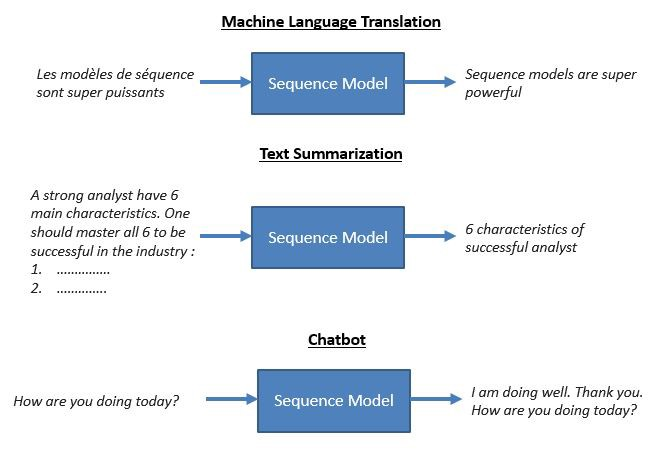

This blog is to give a detail explaination on how seq2seq models are built and to give an intuitive understanding of how they solve these complex tasks.

## seq2seq

NMT(natural machine translation) uses seq2seq model without attention. The Encoder-Decoder architecture with RNN became an effective approach for NMT. The key benefits of the approach are the ability to train a single end-to-end model directly on the source and target sentences and the ability to handle variable-length input and output sequences of text.

Below is an illustration of NMT with an RNN based encoder-decoder architecture.

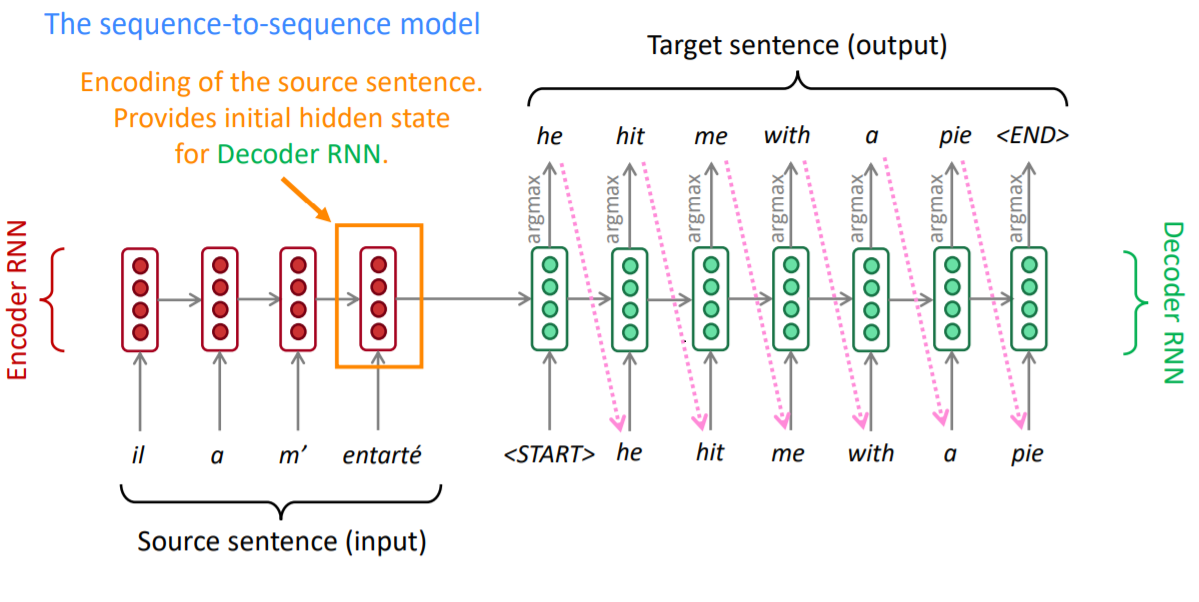

Both encoder and decoder are typically LSTM models (or sometimes GRU models).

The seq2seq model normally has an encoder-decoder architecture, composed of:

### Encoder (eg: Encoder LSTM)

Encoder reads the input sequence and summarizes the information in something called as the internal state vectors (in case of LSTM these are called as the hidden state and cell state vectors). We discard the outputs of the encoder and only preserve the internal states.

- An **encoder** processes the input sequence and compresses the information into a context vector (also known as sentence embedding or “thought” vector) of a fixed length. This representation is expected to be a good summary of the meaning of the whole source sequence.

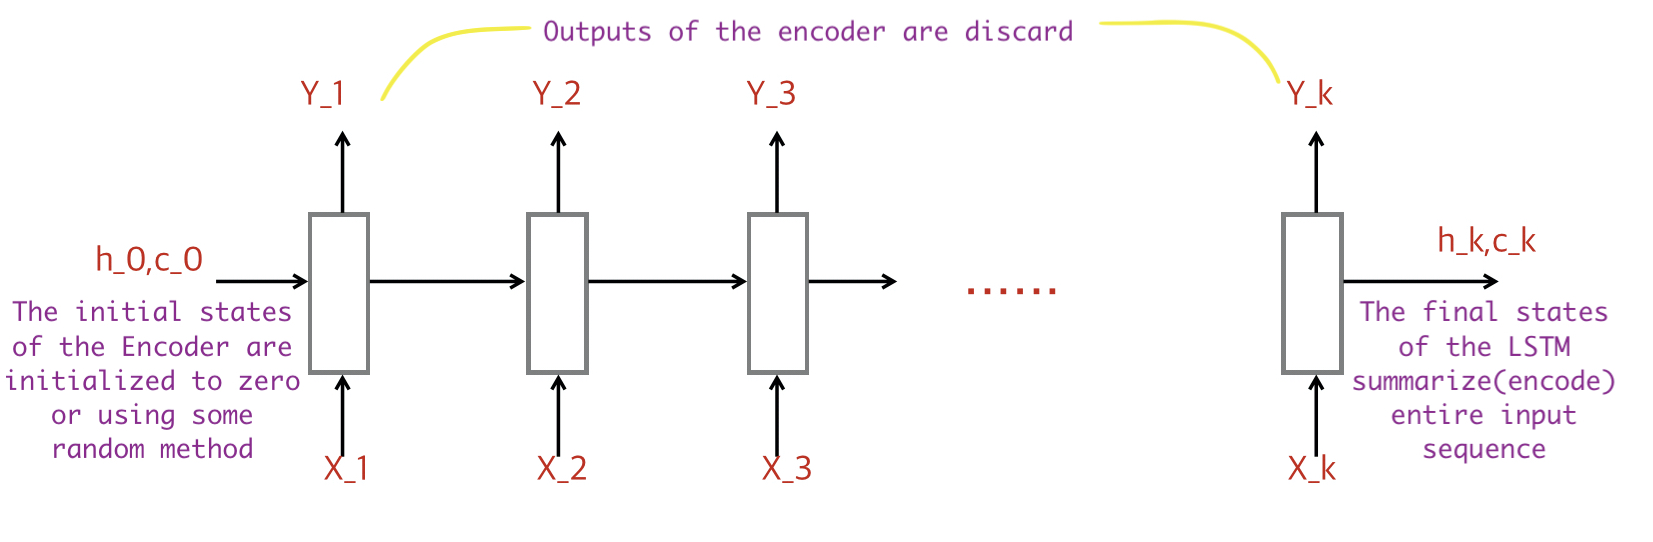

- $X_i$ => Input sequence at time step $i$
- $h_i$ and $c_i$ => LSTM maintains two states ('h' for hidden state and 'c' for cell state) at the each step. Combined together these are internal state of the LSTM at time step $i$ 
- $Y_i$ => Output sequence at time step $i$

Input sentence(English)=>"Rahul is a good boy"

Output sentence(Marathi)=>"राहुल चांगला मुलगा आहे"

#### Explanation for $X_i$

The above English sentence can be thought of as a sequence of 5 words. $X_1$='Rahul', $X_2$='is',$X_3$='a', $X_4$='good', $X_5$='boy'

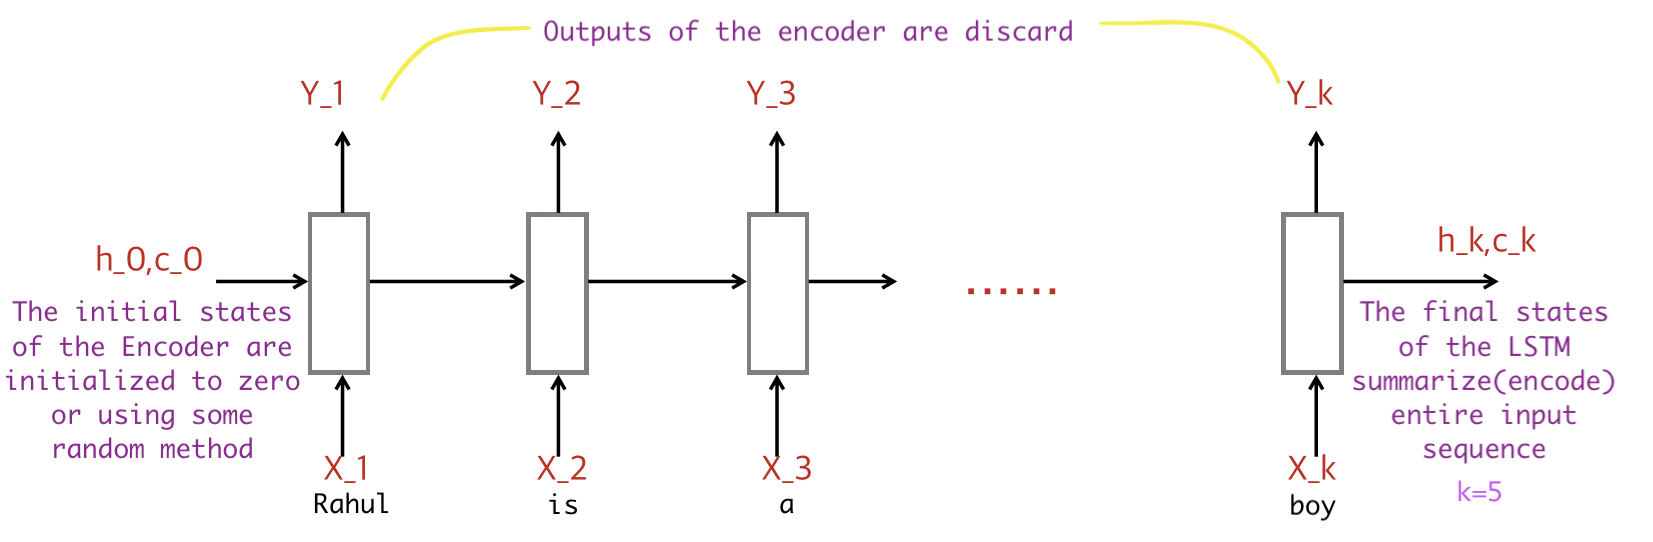

How to represent each $X_i$ as a vector? We will use the Embedding layer to map each word into a fixed length vector.

#### Explanation for $h_i$ and $c_i$

What is the role of the internal states ($h_i$ and $c_i$) at each time step?

In very simple terms, they remember what the LSTM has read(learned) till now. For example:

$h_3,c_3$=> These two vectors will remember that the network has read 'Rahul is a' till now. Basically its the summary of information till time step3 which is stored in the vectors $h_3$ and $c_3$ (thus called the states at time step3).

Similarly, we can thus say that $h_5, c_5$ will contain the summary of the entire input sentence, since this is where the sentence ends(at time step 5). These states coming out of the last time step are also called as the "Thought vectors" as they summarize the entire sequence in a vector form.

**Note**: The size of both of these vectors is equal to number of units (neurons) used in the LSTM cell.

#### Explanation for $Y_i$

$Y_i$ at each time step is the output(prediction) of the LSTM model. But what type of a vector is $Y_i$? More specifically in case of word level language models each $Y_i$ is actually a probability distribution over the entire vocabulary which is generated by using a softmax activation. Thus each $Y_i$ is a vector of size "vocab_size" representing a probability distribution.

Depending on the context of the problem they might sometimes be used or sometimes be discarded.

In our case we have nothing to output unless we have read the entire English sentence. Because we will start generating the output sequence once we have read the entired English sentence. Thus we will discard the $Y_i$ of the Encoder for our problem.

### Decoder (Decoder LSTM) -- Training Mode

Unlike the Encoder LSTM which has the same role to play in both the training phase as well as in the inference phase, the Decoder LSTM has a slightly different role to play in both of these phases. In this section we'll try to understand how to configure the Decoder during the training phase.

Output sequence=> "START_राहुल चांगला मुलगा आहे_END"

The decoder behaves a bit differently during the training and inference procedure. Decoder takes the hidden state of the last Encoder RNN cell as the initial state of its first RNN cell along with the \<start\> token as the initial input to produce an output sequence. We use Teacher Forcing for faster and efficient training of the decoder models that use the ground truth from a prior time step as input.  In this method, the right answer is given as the begining of training so that the model will train quickly and efficiently. During inference, the input to the decoder at each time step is the output from the previous time step.

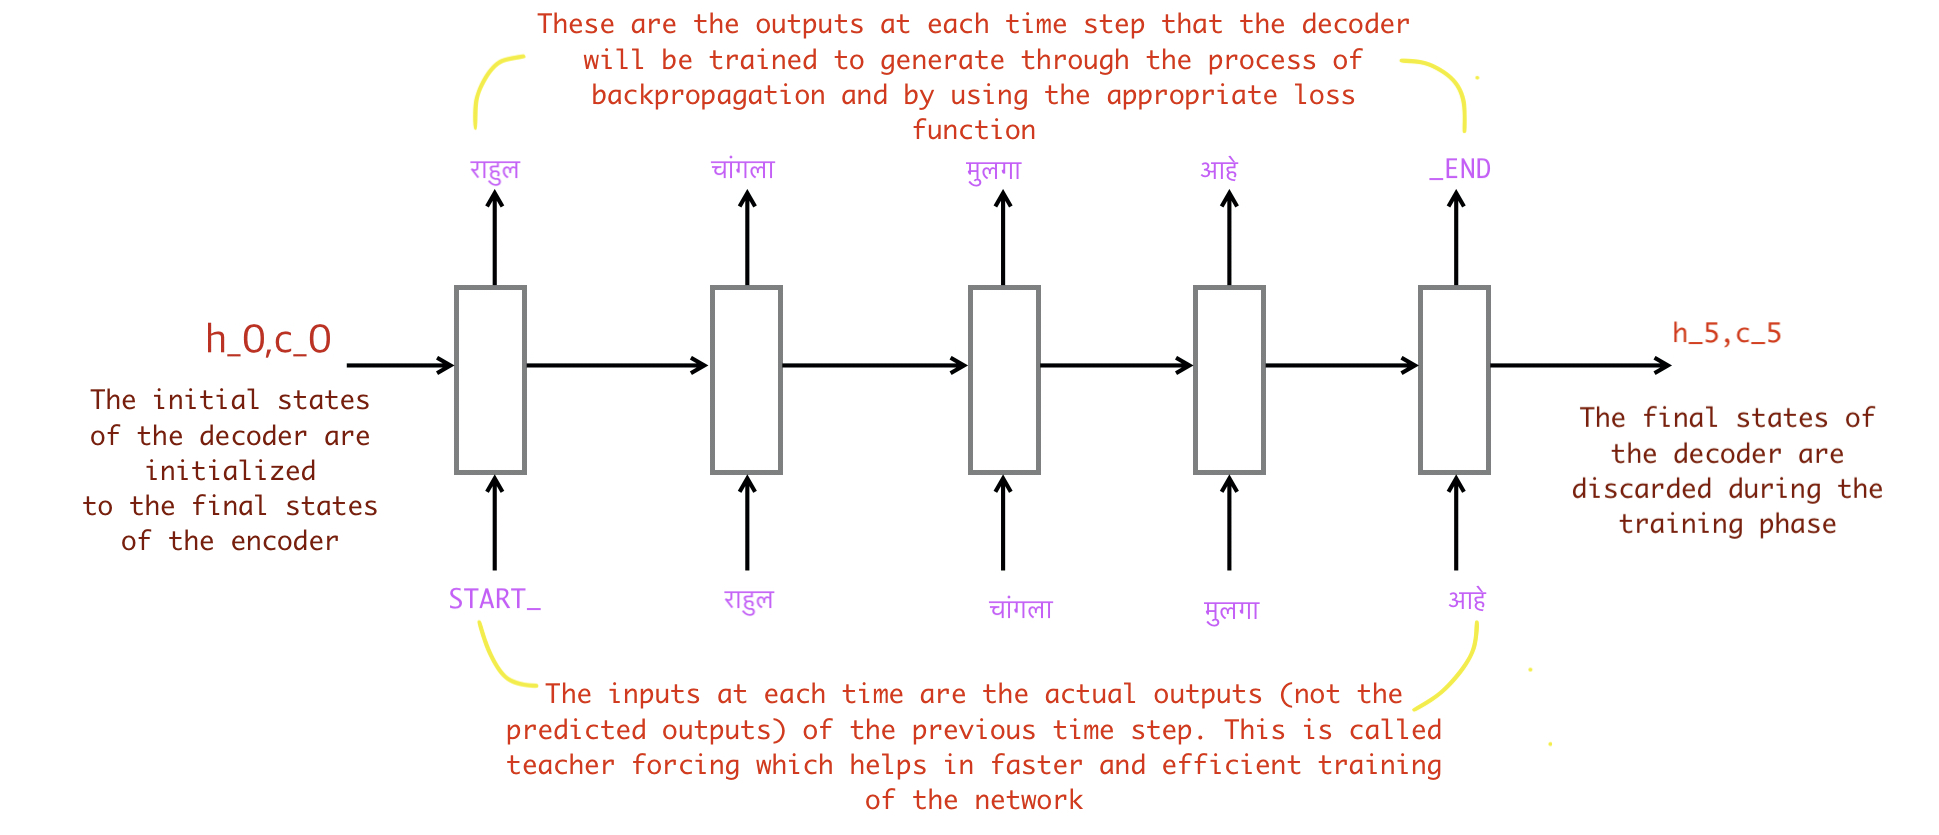

- A **decoder** is initialized with the context vector to emit the transformed output. The early work only used the last state of the encoder network as the decoder initial state.

The most important point is that the initial state $(h_0, c_0)$ of the decoder are set to the final states of the encoder. This intuitively means that the decoder is trained to start generating the output sequence depending on the information encoded by the encoder. **Obviously the translated Marathi sentence must depend on the given English sentence.**

In the first time step we provide the START_ token so that the decoder starts generating the next token (the actual first word of Marathi sentence). **And after the last word in the Marathi sentence, we make the decoder learn to predict the \_END token. This will be used as the stopping condition during the inference procedure, basically it will denote the end of the translated sentence and we will stop the inference loop (more on the later).**

Finally the loss is calculated on the predicted outputs from each time step and the errors are back propagated through time in order to update the parameters of the network. Training the network over longer period with sufficiently large amount of data results in pretty good predictions as we'll see later

The entire training process (Encoder + Decoder) can be summarized in the below diagram:

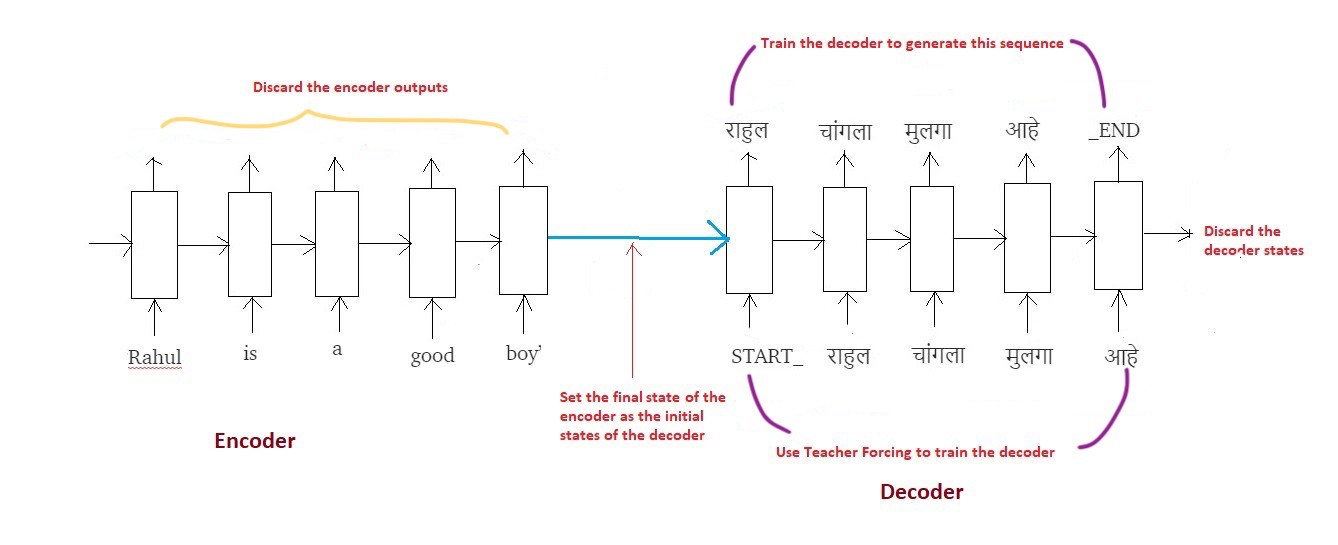

Both the encoder and decoder are recurrent neural networks, i.e. using LSTM or GRU units.

### Decoder (Decoder LSTM) -- Inference Mode

Let's now try to understand the setup required for inference. As already stated the Encoder LSTM plays the same role of reading the input sequence (English sentence) and generating the thought vector $(h_k, c_k)$.

Howerver, the decoder now has to predict the entire output sequence (Marathi sentence) given these thought vectors. Let's try to visually understand by taking the same example.

Input sequence -> "Rahul is a good boy"

(Excepted) Output sequence -> "राहुल चांगला मुलगा आहे"

**Step1**: Encode the input sequence into the Thought Vectors:

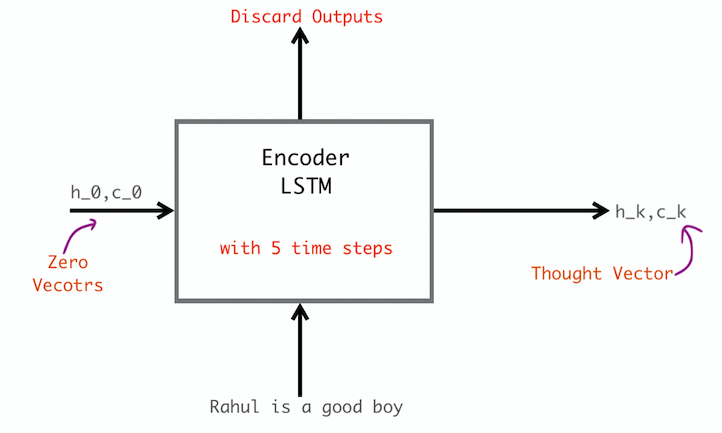

**Step2**:Start generating the output sequence in a loop, word by word:

At t=1

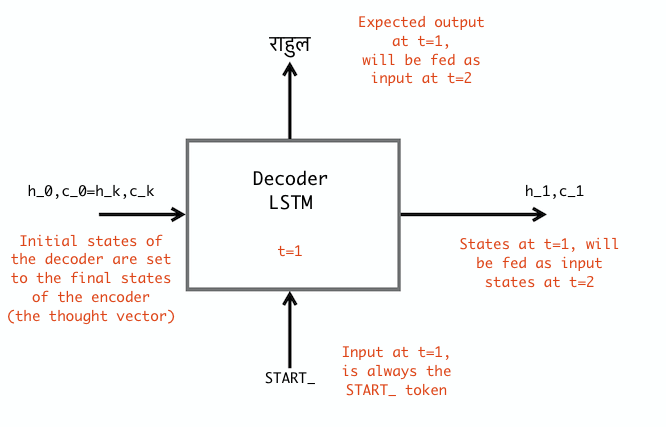

At t=3

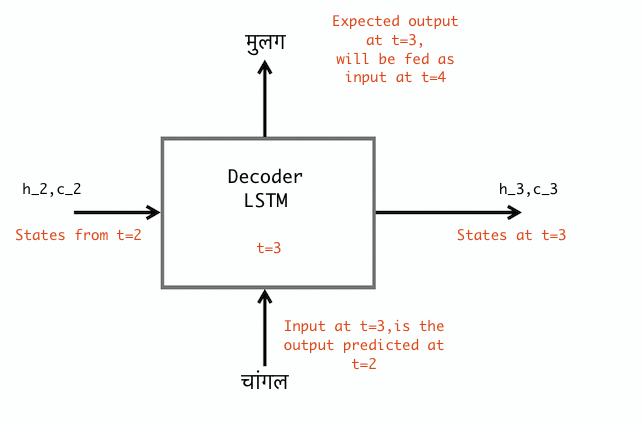

At t=5

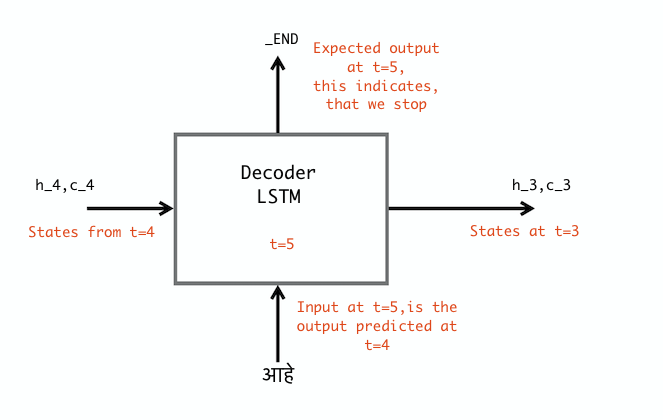

### Inference Algorithm:

- During inference, we generate one word at a time. Thus the Decoder LSTM is called in a loop, every time processing only one time step.    

- The initial states of the decoder are set to the final states of the encoder.    

- The initial input to the decoder is always the START_ token.    

- At each time step, we preserve the states of the decoder and set them as initial states for the next time step.

- At each time step, the predicted output is fed as input in the next time step.

- We break the loop when the decoder predicts the END_ token.

The entire inference procedure can be summarized in the below diagram:

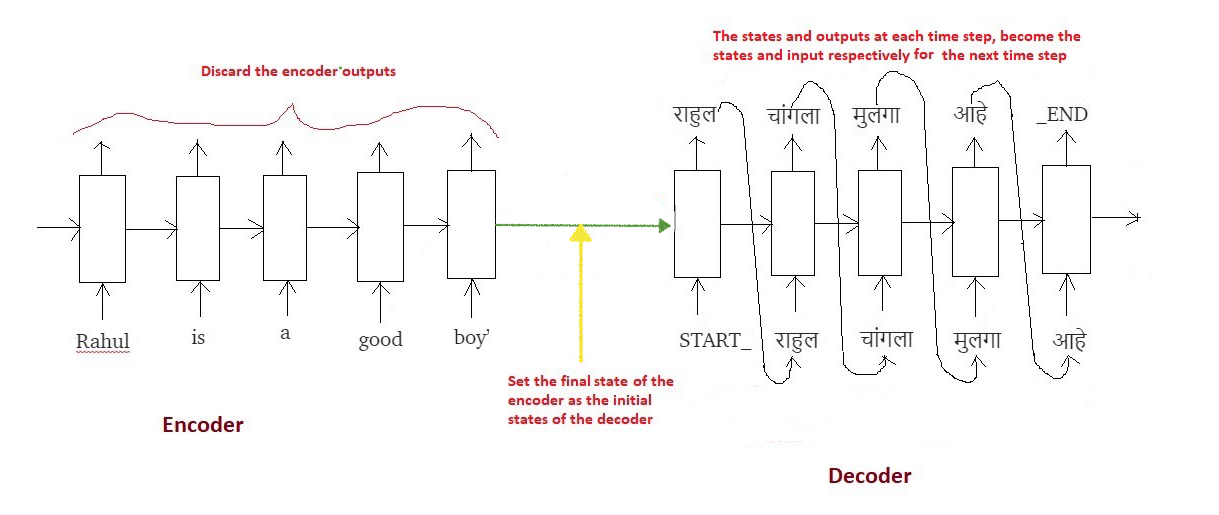